In [1]:
#I'd like to know...
#Where are the best cocoa beans grown?
#Which countries produce the highest-rated bars?
#Can we predict the rating of a chocolate??

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [3]:
data = pd.read_csv('flavors_of_cacao.csv')

In [4]:
data.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
5,A. Morin,Carenero,1315,2014,70%,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70%,France,3.50,,Cuba
7,A. Morin,Sur del Lago,1315,2014,70%,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70%,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319,2014,70%,France,4.00,,Peru


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null object
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           1794 non-null object
Broad Bean
Origin                   1794 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company \n(Maker-if known),1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specific Bean Origin\nor Bar Name,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795,NaN,NaN,NaN,1035.9,552.886,5,576,1069,1502,1952
Review\nDate,1795,NaN,NaN,NaN,2012.33,2.92721,2006,2010,2013,2015,2017
Cocoa\nPercent,1795,45,70%,672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Company\nLocation,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795,NaN,NaN,NaN,3.18593,0.478062,1,2.875,3.25,3.5,5
Bean\nType,1794,41,,887,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad Bean\nOrigin,1794,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Data clearing

In [8]:
#get rid of the percent sign in 'Cocoa\nPercent'
def clean_perc(s):
    frac = s.split("%")
    return np.float32(frac[0])

data['Cocoa\nPercent'] = data['Cocoa\nPercent'].apply(lambda l: clean_perc(l))

In [9]:
#'Rating' bring to type Float64
data['Rating'] = data['Rating'].apply(pd.to_numeric)

In [10]:
#investigate 'Bean\nType'
for n in range(10):
    value = data['Bean\nType'].values[n]
    instance_of = type(value)
    print("This entry has the value \'{}\' and a length of {}".format(value, len(value)))

This entry has the value ' ' and a length of 1
This entry has the value ' ' and a length of 1
This entry has the value ' ' and a length of 1
This entry has the value ' ' and a length of 1
This entry has the value ' ' and a length of 1
This entry has the value 'Criollo' and a length of 7
This entry has the value ' ' and a length of 1
This entry has the value 'Criollo' and a length of 7
This entry has the value 'Criollo' and a length of 7
This entry has the value ' ' and a length of 1


In [11]:
empty = data['Bean\nType'].values[0]

In [12]:
def return_nan(s):
    if s == empty:
        return np.nan
    else:
        return s

for col in data.columns:
    if data[col].dtype == 'O':
        data[col] = data[col].apply(lambda l: return_nan(l))

In [13]:
data.isnull().sum()

Company \n(Maker-if known)             0
Specific Bean Origin\nor Bar Name      0
REF                                    0
Review\nDate                           0
Cocoa\nPercent                         0
Company\nLocation                      0
Rating                                 0
Bean\nType                           888
Broad Bean\nOrigin                    74
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
Company 
(Maker-if known)           1795 non-null object
Specific Bean Origin
or Bar Name    1795 non-null object
REF                                 1795 non-null int64
Review
Date                         1795 non-null int64
Cocoa
Percent                       1795 non-null float64
Company
Location                    1795 non-null object
Rating                              1795 non-null float64
Bean
Type                           907 non-null object
Broad Bean
Origin                   1721 non-null object
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [15]:
#Data exploring

Text(0,0.5,'Counts')

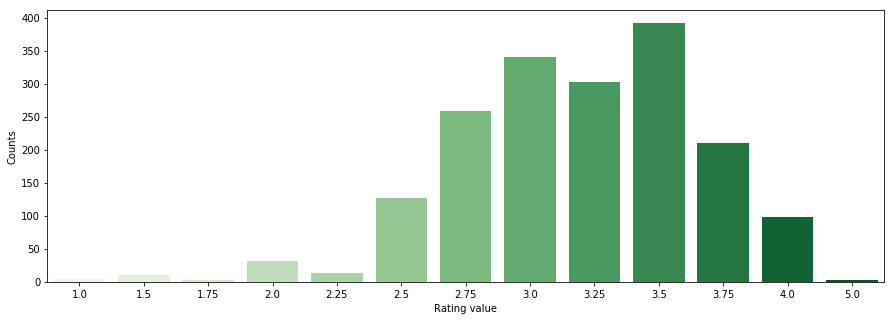

In [16]:
#Rating
rating_counts = data['Rating'].value_counts()

plt.figure(figsize=(15,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Greens")
plt.xlabel("Rating value")
plt.ylabel("Counts")

In [17]:
#replace all rows, where 'Rating' is NaN
values = {'Rating': 0}
data.fillna(value=values);

In [18]:
#estimate 'Rating' to the five-point system
def to_rating(c):
    if c < 2:
        return 1
    elif 2 <= c < 3:
        return 2
    elif 3 <= c < 3.5:
        return 3
    elif 3.5 <= c < 4:
        return 4
    else:
        return 5

In [19]:
data["New_rating"] = data['Rating'].apply(lambda l: to_rating(l))

Text(0,0.5,'Counts')

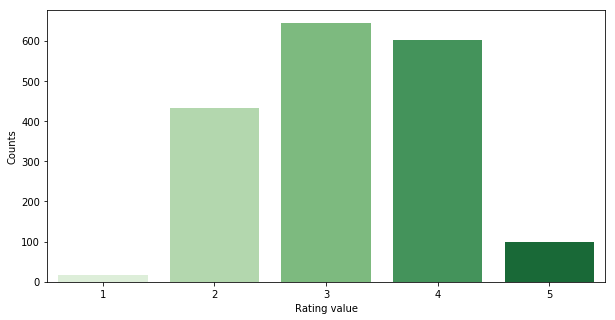

In [20]:
rating_counts = data['New_rating'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="Greens")
plt.xlabel("Rating value")
plt.ylabel("Counts")

In [21]:
# Company 
data['Company\nLocation'].value_counts().head(10)

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Name: Company\nLocation, dtype: int64

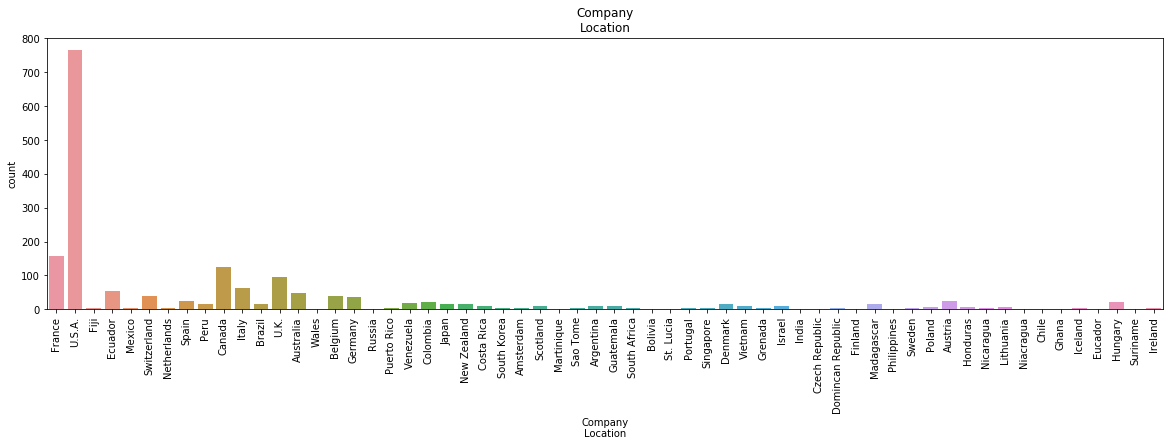

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(data['Company\nLocation'])
plt.xticks(rotation=90);
plt.title("Company\nLocation");

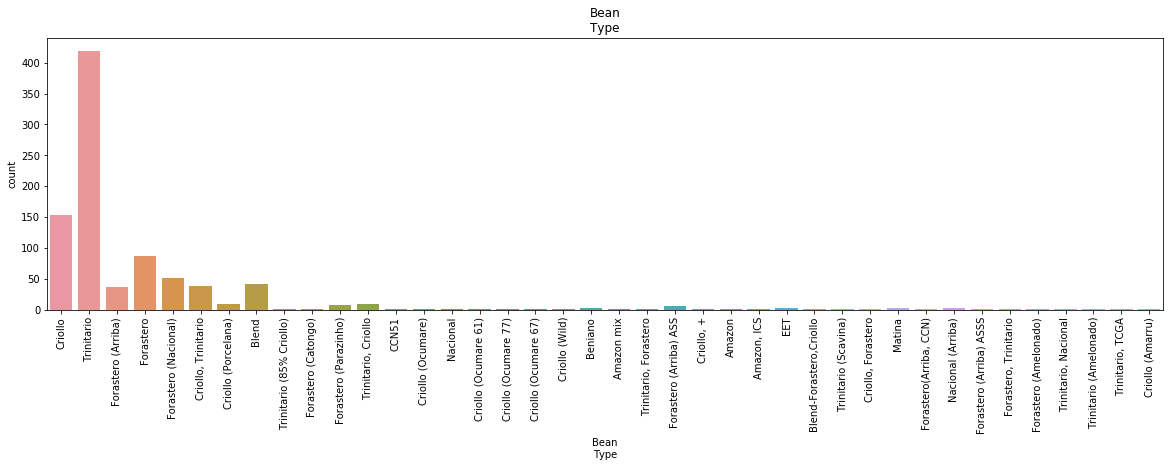

In [23]:
#Bean types
plt.figure(figsize=(20,5))
sns.countplot(data['Bean\nType'])
plt.xticks(rotation=90);
plt.title("Bean\nType");

In [24]:
#Specific 'Broad Bean Origin'
len(data['Broad Bean\nOrigin'].unique())

100

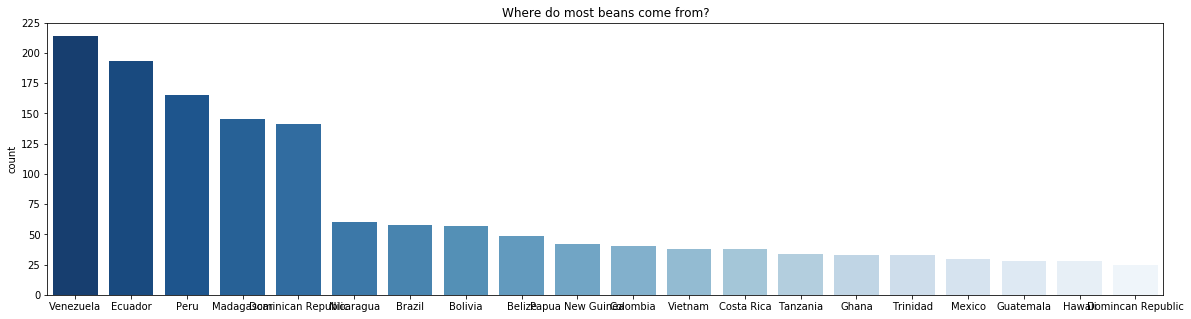

In [25]:
top_counts = data['Broad Bean\nOrigin'].value_counts().head(20)

plt.figure(figsize=(20,5))
sns.barplot(x=top_counts.index, y=top_counts.values, palette="Blues_r")
plt.title("Where do most beans come from?")
plt.ylabel("count");

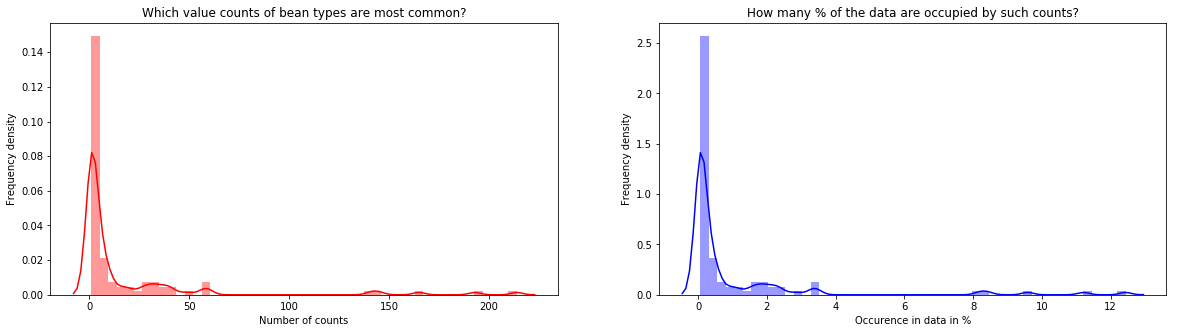

In [26]:
# look at the distribution 'Specific Bean Origin\nor Bar Name'
fig, ax = plt.subplots(1,2, figsize=(20,5))
sns.distplot(data['Broad Bean\nOrigin'].value_counts(), ax=ax[0], color="Red")
sns.distplot(data['Broad Bean\nOrigin'].value_counts() 
             / data['Broad Bean\nOrigin'].count() * 100, ax=ax[1], color="Blue")
ax[0].set_xlabel("Number of counts");
ax[0].set_ylabel("Frequency density");
ax[0].set_title("Which value counts of bean types are most common?")
ax[1].set_xlabel("Occurence in data in %");
ax[1].set_ylabel("Frequency density");
ax[1].set_title("How many % of the data are occupied by such counts?");
#most of the origins have only a few counts

In [27]:
#choose first for research
top_bean_origin = data['Broad Bean\nOrigin'].value_counts().head(30)
data.loc[data['Broad Bean\nOrigin'].isin(top_bean_origin.index),:].shape[0] / data.shape[0] * 100

87.85515320334262

In [28]:
#create a new feature that only contains those of the top 30 bean origins
def to_new_origin(s):
    if s in top_bean_origin:
        return s
    else:
        return 'Another'
    
data['New Bean\nOrigin'] = data['Broad Bean\nOrigin'].apply(lambda s: to_new_origin(s))

In [29]:
#Predicting the chocolate rating with xgboost

In [30]:
data.head(10)

,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin,New_rating,New Bean Origin
0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,NaN,Sao Tome,4,Sao Tome
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,NaN,Togo,2,Another
2,A. Morin,Atsane,1676,2015,70.0,France,3.00,NaN,Togo,3,Another
3,A. Morin,Akata,1680,2015,70.0,France,3.50,NaN,Togo,4,Another
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,NaN,Peru,4,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela,2,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,NaN,Cuba,4,Cuba
7,A. Morin,Sur del Lago,1315,2014,70.0,France,3.50,Criollo,Venezuela,4,Venezuela
8,A. Morin,Puerto Cabello,1319,2014,70.0,France,3.75,Criollo,Venezuela,4,Venezuela
9,A. Morin,Pablino,1319,2014,70.0,France,4.00,NaN,Peru,5,Peru


In [31]:
#fill NaN in 'Bean Type'
data["Bean\nType"] = data["Bean\nType"].fillna("None")

In [32]:
#fill NaN in 'Bean Type'
data["Broad Bean\nOrigin"] = data["Broad Bean\nOrigin"].fillna("Another")

In [33]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company \n(Maker-if known),1795,416,Soma,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Specific Bean Origin\nor Bar Name,1795,1039,Madagascar,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REF,1795,NaN,NaN,NaN,1035.9,552.886,5,576,1069,1502,1952
Review\nDate,1795,NaN,NaN,NaN,2012.33,2.92721,2006,2010,2013,2015,2017
Cocoa\nPercent,1795,NaN,NaN,NaN,71.6983,6.32312,42,70,70,75,100
Company\nLocation,1795,60,U.S.A.,764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,1795,NaN,NaN,NaN,3.18593,0.478062,1,2.875,3.25,3.5,5
Bean\nType,1795,41,None,888,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Broad Bean\nOrigin,1795,100,Venezuela,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New_rating,1795,NaN,NaN,NaN,3.18719,0.895643,1,2.5,3,4,5


In [34]:
# Getting dummy categorical features
data = pd.get_dummies(data)
print(data.shape)

(1795, 1692)


In [35]:
X = data.drop(["Rating", "New_rating"], axis=1)
y = data['Rating']

In [36]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=0)

In [37]:
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

my_pipeline_XGBoost = make_pipeline(SimpleImputer(), XGBRegressor(n_estimators=1000, learning_rate=0.01))

In [38]:
my_pipeline_XGBoost.fit(x_train, y_train)
predictions_XGBoost = my_pipeline_XGBoost.predict(x_test)

In [39]:
# calculate RMSD
from sklearn.metrics import mean_squared_error
from math import sqrt

print('RMSD XGBoost is', sqrt(mean_squared_error(y_test, predictions_XGBoost)))

RMSD XGBoost is 0.43086815649394433
